In [2]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd
import os
from scipy import sparse

### GSE147424

In [2]:
import os
import scanpy as sc
import pandas as pd
from scipy import sparse

# === Config ===
folder_path = '/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/GSE147424'
output_folder = os.path.join(folder_path, "h5ad_sparse")
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Process each file ===
for file_name in sorted(os.listdir(folder_path)):
    if file_name.endswith('.txt.gz'):
        print(f"Processing: {file_name}")
        sample_name = file_name.split('.')[0]
        count_data_file = os.path.join(folder_path, file_name)

        # Load data — gene names are rownames, cells are columns
        df = pd.read_csv(count_data_file, index_col=0)
        
        # Transpose: now rows = cells, columns = genes
        df = df.T.astype('float32')

        # Convert to sparse matrix
        X_sparse = sparse.csr_matrix(df.values)

        # Create AnnData
        adata = sc.AnnData(X=X_sparse)
        adata.obs_names = df.index  # cell names
        adata.var_names = df.columns  # gene names
        adata.obs['sample'] = sample_name

        # Store raw counts
        adata.layers["raw_data"] = adata.X.copy()

        # Ensure unique cell names
        adata.obs_names_make_unique()

        # Save to disk
        adata.write(os.path.join(output_folder, f"{sample_name}.h5ad"), compression="gzip")

print("✅ All individual samples processed and saved.")


Processing: GSM4430459_MS.sample1.clean.data.txt.gz


Processing: GSM4430460_MS.sample2.clean.data.txt.gz
Processing: GSM4430461_MS.sample3.clean.data.txt.gz
Processing: GSM4430462_MS.sample4.clean.data.txt.gz
Processing: GSM4430463_MS.sample5.clean.data.txt.gz
Processing: GSM4430464_MS.sample6.clean.data.txt.gz
Processing: GSM4430465_MS.sample7.clean.data.txt.gz
Processing: GSM4430466_MS.sample8.clean.data.txt.gz
Processing: GSM4430467_MS.sample9.clean.data.txt.gz
Processing: GSM4430468_MS.sample10.clean.data.txt.gz
Processing: GSM4430469_MS.sample11.clean.data.txt.gz
Processing: GSM4430470_MS.sample12.clean.data.txt.gz
Processing: GSM4430471_MS.sample13.clean.data.txt.gz
Processing: GSM4430472_MS.sample14.clean.data.txt.gz
Processing: GSM4430473_MS.sample15.clean.data.txt.gz
Processing: GSM4430474_MS.sample16.clean.data.txt.gz
Processing: GSM4430475_MS.sample17.clean.data.txt.gz
✅ All individual samples processed and saved.


In [3]:
# === Optional Step: Load and concatenate all h5ad files ===
h5ad_files = sorted([os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.h5ad')])
adatas = [sc.read(f) for f in h5ad_files]

# Concatenate while preserving sample information
combined_adata = sc.concat(adatas, label='sample', join='outer', merge='same')
combined_adata.write(os.path.join(folder_path, "combined_sparse.h5ad"), compression="gzip")

print("✅ All samples merged into combined_sparse.h5ad")


✅ All samples merged into combined_sparse.h5ad


### GSE144236

In [2]:
count_data_file = '/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/GSE144236/GSE144236_cSCC_counts.txt.gz'

# Load with optimized settings
df = pd.read_csv(
    count_data_file,
    index_col=0,
    sep='\t',
    compression='gzip'
)

# Transpose for AnnData format (cells as rows, genes as columns)
df = df.T


In [16]:
# Convert to sparse matrix
X_sparse = sparse.csr_matrix(df.iloc[:,2:].values)

# Create AnnData
adata = sc.AnnData(X=X_sparse)
adata.obs_names = df.index  # cell names
adata.var_names = df.iloc[:,2:].columns  # gene names
adata.obs['sample'] = df.iloc[:,0] # Patient
# adata.obs['tissue'] = df.iloc[:,1] # Tissue type (0=normal, 1=tumor)
adata.obs['tissue'] = df.iloc[:, 1].map({0: 'normal', 1: 'tumor'}).astype('category')

# Store raw counts
adata.layers["raw_data"] = adata.X.copy()

In [20]:
adata.write('/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/GSE144236/cSCC.h5ad', compression="gzip")

### E-MTAB-8142

In [ ]:
file_path = '/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/E-MTAB-8142/arrayexpress_counts.txt'

df = pd.read_csv(file_path, sep='\t', index_col=0)
df = df.T

In [2]:
import pandas as pd

file_path = '/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/E-MTAB-8142/arrayexpress_counts.txt'

# Load only numeric columns with dtype float32, leave gene names as index
df = pd.read_csv(
    file_path,
    sep='\t',
    index_col=0,
    low_memory=False,
    memory_map=True
)

# Now convert data to float32 AFTER loading
df = df.astype('float32')
df = df.T


In [9]:
# Convert to sparse matrix
X_sparse = sparse.csr_matrix(df.values)

# Create AnnData
adata = sc.AnnData(X=X_sparse)
adata.obs_names = df.index  # cell names
adata.var_names = df.columns  # gene names

# Store raw counts
adata.layers["raw_data"] = adata.X.copy()

In [13]:
adata

AnnData object with n_obs × n_vars = 82228 × 23310
    layers: 'raw_data'

In [14]:
meta_df = pd.read_csv('/home/genos/gmunoz/SCRATCH/Projects/scRNA_Project/raw_data/E-MTAB-8142/arrayexpress_metadata.txt', sep='\t')

In [18]:
meta_df

,Cell,SampleID,Sample,Tissue_layer,Flow_gate,Cell_group,Cell_type
0,s1_Derm_Fibro_AAACCTGAGACTCGGA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
1,s1_Derm_Fibro_AAACCTGCAAAGGCGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
2,s1_Derm_Fibro_AAACGGGTCCAGTAGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
3,s1_Derm_Fibro_AAAGATGAGAGGACGG,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
4,s1_Derm_Fibro_AAAGATGGTTCCGGCA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
...,...,...,...,...,...,...,...
82223,s3_Derm_Mac_DC_ACACCCTAGCGTAATA,4820STDY7389010,s3,Dermis,Dermal myeloid,pDC,pDC
82224,s1_Derm_Mac_DC_AGATTGCCATCAGTCA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC
82225,s3_Derm_Mac_DC_TATGCCCGTGTGAAAT,4820STDY7389010,s3,Dermis,Dermal myeloid,Dermal APC,moDC1
82226,s1_Derm_Mac_DC_CACAGGCTCAACGGGA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC


### Stuff

In [5]:
# gene signature of CD4 and CD8

cd4_genes = ['CD4', 'CD3D', 'CD3E', 'CD3G']

sc.tl.score_genes(adata, cd4_genes, score_name='CD4_score')

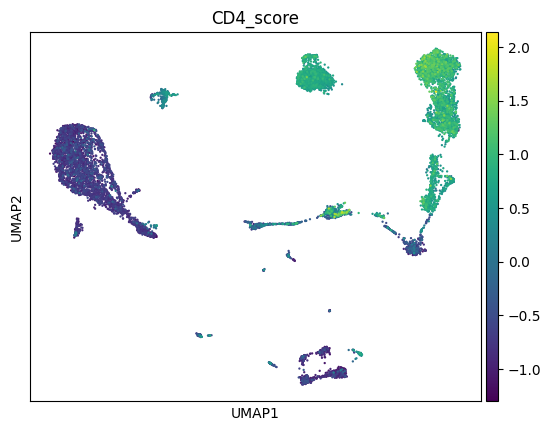

In [11]:
sc.pl.umap(adata, color = 'CD4_score')